In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
%matplotlib notebook

stat_length = 0

def Linestyles():
    linestyles = ["-", "--", "-.", ":"]
    i = 0
    while True:
        yield linestyles[i]
        i += 1
        i %= 4

def average(steps, losses, length=0):
    avgs = []
    for n in range(0, len(steps) - length):
        avgs.append(np.mean(losses[n : n + length + 1]))
    return steps[:len(steps) - length], avgs

def extract_stat_list(stat_dicts, feature_list=None):
    names = stat_dicts[0]['error names']
    epochs = [stat_dict['Epoch'] for stat_dict in stat_dicts]
    errors = [stat_dict['errors'] for stat_dict in stat_dicts]
    errors = np.array(errors)
    error_dict = {"epochs": epochs}
    for i in range(len(names)):
        error_dict[names[i]] = errors[:, i]
    if feature_list is not None:
        new_error_dict = {"epochs": epochs}
        for name in feature_list:
            new_error_dict[name] = error_dict[name]
        return new_error_dict
    else:
        return error_dict

def extract_loss_list(loss_dicts):
    steps = [loss_dict['step'] for loss_dict in loss_dicts]
    losses = [loss_dict['loss'] for loss_dict in loss_dicts]
    return steps, losses

def plot_losses(path, ax, **args):
    loss_dicts = pickle.load(open(path, 'rb'))
    ax.plot(*average(*extract_loss_list(loss_dicts)), **args)
    
def plot_stat(path, lyrics_ax, linestyles, feature_list=None, **args):
    stat_dict = pickle.load(open(path, "rb"))
    error_dict = extract_stat_list(stat_dict, feature_list)
    for name in error_dict:
        if name != "epochs":
            new_args = args.copy()
            new_args["label"] += name
            new_args["linestyle"] = next(linestyles)
            lyrics_ax.plot(*average(error_dict["epochs"], error_dict[name], length=stat_length), **new_args)
    
def plot_all(task, date, config, names, loss_ax, lyrics_ax, feature_list=None, **args):
    linestyles = Linestyles()
    stat_dir = os.path.join("/n/work1/deng/workspaces/statistics/", task, date, f"config={config}.yaml")
    loss_path = os.path.join(stat_dir, "losses_statistics.pkl")
    if loss_ax is not None:
        plot_losses(loss_path, loss_ax, **args)
    for name in names:
        stat_path = os.path.join(stat_dir, f"{name}_statistics.pkl")
        new_args = args.copy()
        new_args["label"] += f" on {name}, "
        print(stat_path)
        plot_stat(stat_path, lyrics_ax, linestyles, feature_list, **new_args)

def extract_stat_list_old(stat_dicts):
    epochs = [stat_dict['Epoch'] for stat_dict in stat_dicts]
    wers = [stat_dict['WER'] for stat_dict in stat_dicts]
    error_dict = {"epochs": epochs, "WER": wers,}
#     cers = [stat_dict['CER'] for stat_dict in stat_dicts]
#     error_dict = {"epochs": epochs, "WER": wers, "CER": cers}
    return error_dict

def plot_stat_old(path, lyrics_ax, linestyles, **args):
    stat_dict = pickle.load(open(path, "rb"))
    error_dict = extract_stat_list_old(stat_dict)
    for name in error_dict:
        if name != "epochs":
            new_args = args.copy()
            new_args["label"] += name
            new_args["linestyle"] = next(linestyles)
            lyrics_ax.plot(error_dict["epochs"], error_dict[name], **new_args)

def plot_all_old(task, date, config, names, loss_ax, lyrics_ax, **args):
    linestyles = Linestyles()
    stat_dir = os.path.join("/n/work1/deng/workspaces/statistics/", task, date, f"config={config}.yaml")
    loss_path = os.path.join(stat_dir, "losses_statistics.pkl")
    plot_losses(loss_path, loss_ax, **args)
    for name in names:
        stat_path = os.path.join(stat_dir, f"{name}_statistics.pkl")
        new_args = args.copy()
        new_args["label"] += f" on {name}, "
        print(stat_path)
        plot_stat_old(stat_path, lyrics_ax, linestyles, **new_args)

<IPython.core.display.Javascript object>


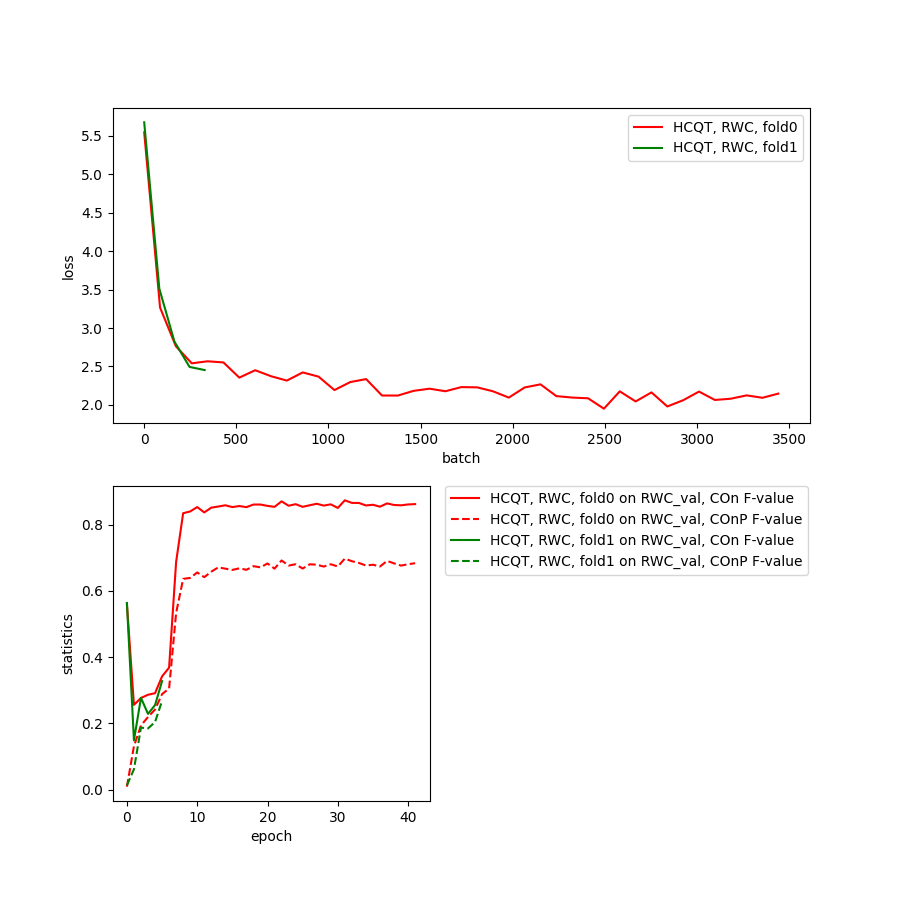

/n/work1/deng/workspaces/statistics/RWC-tatum/20220607/config=RWC_pitch_cqt_1_1_2ch_tatum_separated_fold0.yaml/RWC_val_statistics.pkl
/n/work1/deng/workspaces/statistics/RWC-tatum/20220607/config=RWC_pitch_cqt_1_1_2ch_tatum_separated_fold1.yaml/RWC_val_statistics.pkl


In [24]:
figure, axes = plt.subplot_mosaic([['top', 'top'], ['bottom1', 'BLANK']],
                                  empty_sentinel="BLANK")
figure.set_size_inches(9, 9)
axes['top'].set_xlabel("batch")
axes['top'].set_ylabel("loss")
# axes['top'].set_ylim(0, 8)

axes['bottom1'].set_xlabel("epoch")
axes['bottom1'].set_ylabel("statistics")
# axes['bottom1'].set_xlim(-1, 10)
# axes['bottom1'].set_ylim(0., 0.5)

# plot_all("RWC-tatum", "20220604", "RWC_pitch_cqt_1_1_2ch_tatum", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="r", label="HCQT, RWC, fold0")
# # Errorly write DALI_val, in fact RWC_test

# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_fold0", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="r", label="HCQT, RWC, fold0")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_fold1", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="g", label="HCQT, RWC, fold1")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_fold2", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="b", label="HCQT, RWC, fold2")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_fold3", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="cyan", label="HCQT, RWC, fold3")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_fold4", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="purple", label="HCQT, RWC, fold4")

plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_separated_fold0", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="r", label="HCQT, RWC, fold0")
plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_separated_fold1", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="g", label="HCQT, RWC, fold1")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_separated_fold2", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="b", label="HCQT, RWC, fold2")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_separated_fold3", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="cyan", label="HCQT, RWC, fold3")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_separated_fold4", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="purple", label="HCQT, RWC, fold4")

# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_mix_fold0", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="black", label="HCQT, RWC, mixture, fold0")
# plot_all("RWC-tatum", "20220607", "RWC_pitch_cqt_1_1_2ch_tatum_separated_fold0", ["RWC_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value"], color="yellow", label="HCQT, RWC, mixture, fold0")


# plot_all("DALI-pitch-only", "20220516", "DALI_pitch_cqt_1_1_2ch_frame", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="g", label="HCQT")


axes['top'].legend()
# axes['bottom1'].legend()
axes['bottom1'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# axes['bottom2'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [51]:
statistics = pickle.load(open("/n/work1/deng/workspaces/statistics/RWC-tatum/20220606/config=RWC_pitch_cqt_1_1_2ch_tatum_fold3.yaml/RWC_val_statistics.pkl", 'rb'))
np.max([item['errors'] for item in statistics], axis=0)

array([0.61001378, 0.65306793, 0.81803735])

<IPython.core.display.Javascript object>


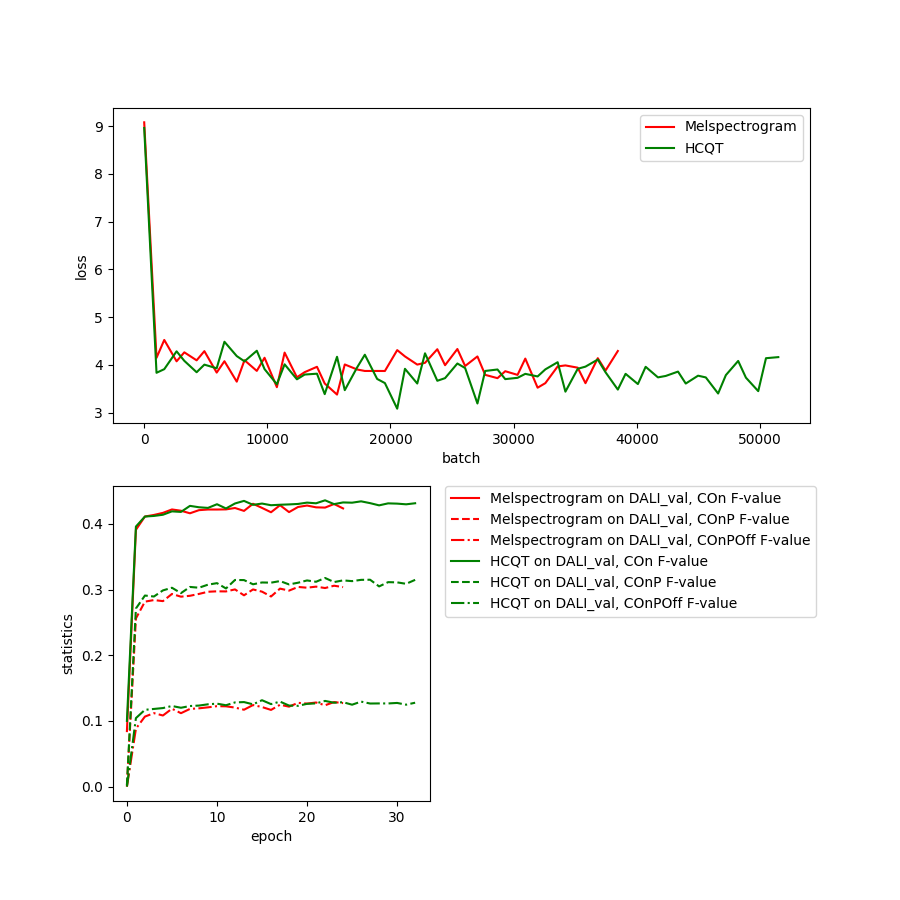

/n/work1/deng/workspaces/statistics/DALI-pitch-only/20220425/config=DALI_pitch_1_1_2ch_frame_index.yaml/DALI_val_statistics.pkl
/n/work1/deng/workspaces/statistics/DALI-pitch-only/20220516/config=DALI_pitch_cqt_1_1_2ch_frame.yaml/DALI_val_statistics.pkl


In [7]:
figure, axes = plt.subplot_mosaic([['top', 'top'], ['bottom1', 'BLANK']],
                                  empty_sentinel="BLANK")
figure.set_size_inches(9, 9)
axes['top'].set_xlabel("batch")
axes['top'].set_ylabel("loss")
# axes['top'].set_ylim(0, 8)

axes['bottom1'].set_xlabel("epoch")
axes['bottom1'].set_ylabel("statistics")
# axes['bottom1'].set_xlim(-1, 3)
# axes['bottom1'].set_ylim(0., 0.5)

# plot_all("DALI-pitch-only", "20220421", "DALI_pitch_base", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="pink", label="DALI pitch, base")
# plot_all("DALI-pitch-only", "20220415", "DALI_pitch_1_1_onset20_nofffset", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="r", label="onset 20 no offset")

plot_all("DALI-pitch-only", "20220425", "DALI_pitch_1_1_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="r", label="Melspectrogram")
# plot_all("DALI-pitch-only", "20220501", "DALI_pitch_0_1_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="orange", label="onset detection only")
# plot_all("DALI-pitch-only", "20220502", "DALI_onset", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value"], color="red", label="onset detection only")

plot_all("DALI-pitch-only", "20220516", "DALI_pitch_cqt_1_1_2ch_frame", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="g", label="HCQT")


# plot_all("DALI-multitask", "20220510", "DALI_pitch_ctc_int_no128_5e-4_noLibri_withCE", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn", "COnP", "COnPOff", "Frame Error"], color="green", label="+ pitch CTC")
# plot_all("DALI-multitask", "20220510", "DALI_pitch_ctc_int_no128_5e-4_noLibri_CEonly", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn", "COnP", "COnPOff", "Frame Error"], color="blue", label="only pitch + onset")



# plot_all("DALI-melody", "20220421", "DALI_melody_base", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["VR", "VFA", "RPA", "RCA", "OA"], color="pink", label="DALI melody offset")
# plot_all("DALI-melody", "20220421", "DALI_melody_blurring", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["VR", "VFA", "RPA", "RCA", "OA"], color="purple", label="DALI melody offset, blurring")



# Zero
# plot_all("DALI-mix", "20220416", "DALI_zero_pitch_zero_onset", ["new_DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="black", label="zero pitch + zero onset")
# plot_all("DALI-mix", "20220424", "DALI_zero_pitch_zero_onset_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="black", label="zero pitch + onset")

# Pitch + Onset
# plot_all("DALI-mix", "20220416", "DALI_pitch_onset_nooffset", ["new_DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="blue", label="pitch + onset, max pooling")
# plot_all("DALI-mix", "20220424", "DALI_pitch_onset_new_downsample_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="green", label="oracle pitch + onset")


# Multitask
# plot_all("DALI-multitask", "20220424", "DALI_multi_1_1_1_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="blue", label="normal multitask")

# plot_all("DALI-multitask", "20220424", "DALI_multi_1_1_1_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], 
#          feature_list=["WER"], 
# #          feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], 
#          color="blue", label="normal multitask")

# plot_all("DALI-multitask", "20220501", "DALI_multi_0_1_1_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], 
# #          feature_list=["WER"], 
# #          feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], 
#          feature_list=["COn F-value","WER"], 
#          color="green", label="multitask with onset only")

# plot_all("DALI-mix", "20220501", "DALI_zero_pitch_with_onset_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="orange", label="zero pitch + oracle onset")


# + pitch ctc
# plot_all("DALI-multitask", "20220501", "DALI_multi_pitch_ctc_0_0.1_1_1", ["DALI_val"], axes['top'], axes['bottom1'], 
#          feature_list=["WER"],
# #          feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], 
#          color="purple", label="with pitch CTC, 0:0.1:1:1")

# plot_all("DALI-multitask", "20220501", "DALI_multi_pitch_ctc_1_0.1_1_1", ["DALI_val"], axes['top'], axes['bottom1'], 
#          feature_list=["WER"], 
# #          feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], 
#          color="green", label="with pitch CTC, 1:0.1:1:1")



axes['top'].legend()
# axes['bottom1'].legend()
axes['bottom1'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# axes['bottom2'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [4]:
# plot_all("DALI-multitask", "20220426", "DALI_multiple_CTC_1_1_1_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="cyan", label="multiple CTC multitask")
# plot_all("DALI-multitask", "20220426", "DALI_multiple_CTC_1_1_1_2ch_frame_index", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="cyan", label="multiple CTC multitask")
# plot_all("DALI-multitask", "20220427", "DALI_multiple_CTC_1_1_1_2ch_frame_index_42_90", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="yellow", label="multiple CTC multitask 42-90")


# plot_all("DALI-multitask", "20220428", "DALI_multiple_CTC_0_1_1_0", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="yellow", label="multiple CTC multitask 0~128")
# plot_all("DALI-multitask", "20220428", "DALI_multiple_CTC_0_1_1_0", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="yellow", label="multiple CTC multitask 0~128")


# plot_all("DALI-multitask", "20220429", "DALI_multiple_CTC_0_1_1_0_pitch_42_90", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="orange", label="multiple CTC multitask 42~90")
# plot_all("DALI-multitask", "20220429", "DALI_multiple_CTC_0_1_1_0_pitch_42_90", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["COn F-value", "COnP F-value", "COnPOff F-value"], color="orange", label="multiple CTC multitask")



In [5]:
statistics = pickle.load(open("./statistics/DALI-multitask/20220509/config=DALI_pitch_ctc_int_no128_1e-4_noLibri_withCE.yaml/DALI_val_statistics.pkl", 'rb'))
np.max([item['errors'] for item in statistics], axis=0)

array([1.12656711e-01, 2.90573423e-01, 4.06792898e-01, 9.97645410e-01,
       9.05344655e-04])

In [10]:
statistics = pickle.load(open("./statistics/DALI-multitask/20220510/config=DALI_pitch_ctc_int_no128_1e-4_noLibri_CEonly.yaml/DALI_val_statistics.pkl", 'rb'))
np.max([item['errors'] for item in statistics], axis=0)

array([9.31666805e-02, 2.61032277e-01, 3.88124403e-01, 9.83513709e-01,
       5.13375513e-05])

In [6]:
statistics = pickle.load(open("./statistics/DALI-pitch-only/20220425/config=DALI_pitch_1_1_2ch_frame_index.yaml/DALI_val_statistics.pkl", 'rb'))
np.max([item['errors'] for item in statistics], axis=0)

array([0.1287532 , 0.30578365, 0.43048312, 0.9979909 ])

In [6]:
statistics = pickle.load(open("./statistics/DALI-mix/20220424/config=DALI_pitch_onset_new_downsample_2ch_frame_index.yaml/DALI_val_statistics.pkl", 'rb'))
np.min([item['errors'][-2] for item in statistics])
[item['errors'][-2] for item in statistics]

[0.9139153843135228,
 0.8351297234512454,
 0.7608245825544045,
 0.7044397133461029,
 0.6779240931375203,
 0.6452674057252032,
 0.6357912458449825,
 0.6261222931625317,
 0.6237077216881073,
 0.618377194737724,
 0.6049692085239003,
 0.6028712238852033,
 0.5980959182975821,
 0.5974522486528204,
 0.5885820287079555,
 0.5931610122142498,
 0.5903737833578433,
 0.5805511702825531,
 0.5879572556047055,
 0.5754871946491308,
 0.5838092601186966,
 0.5819641451019977,
 0.5766726001593674,
 0.5798709054849834,
 0.580244811195145,
 0.5800037904880836,
 0.5732877366989888,
 0.5732471047818096,
 0.5744618515520794,
 0.5776701222028247,
 0.5699969971272547,
 0.57749807785554,
 0.5731949676849172,
 0.5699148395326699,
 0.5768458488049607,
 0.5698586067668397,
 0.5744135577798495,
 0.575600110348494,
 0.5746139710992637,
 0.5797414411504614,
 0.5846536612546354,
 0.5739177810072398,
 0.5745122525707138,
 0.5777428419633602,
 0.5758786758931951,
 0.5750183611013544]

In [7]:
statistics = pickle.load(open("./statistics/DALI-multitask/20220424/config=DALI_multi_1_1_1_2ch_frame_index.yaml/DALI_val_statistics.pkl", 'rb'))
np.min([item['errors'][-2] for item in statistics])
[item['errors'][-2] for item in statistics]

[0.9146610810491037,
 0.8289641343818652,
 0.7892505349433796,
 0.7542315620487888,
 0.7133078182965241,
 0.6938807025755624,
 0.6794818181237905,
 0.6723824395185638,
 0.6528400883480643,
 0.6585221024778748,
 0.6375668886985287,
 0.6325699691069693,
 0.6202014686038914,
 0.6192863698671313,
 0.6202035766103747,
 0.6212494921800641,
 0.6183337861340535,
 0.6206950481052314,
 0.6165024416366732,
 0.6140728723896464,
 0.6101945113007251,
 0.6068010734507504,
 0.6100854000522967,
 0.6083384263403474,
 0.6061708887509991,
 0.6017664571465399,
 0.6014752546094303,
 0.6015677195647166,
 0.6182162317839374,
 0.6058492621795085,
 0.5999477929432899,
 0.6027525126244117,
 0.6006973177406715,
 0.5997968066086159,
 0.6004574733469342,
 0.601624898587048,
 0.5989323863415872,
 0.5984830152590862,
 0.5991475303526552,
 0.5992657409242012,
 0.5976292121412191,
 0.598376249892718,
 0.5982099951728588,
 0.6031786668157233,
 0.5996050885726343,
 0.5989367205581867,
 0.5961442254553941,
 0.600810479215

In [8]:
statistics = pickle.load(open("./statistics/DALI-multitask/20220430/config=DALI_multi_pitch_ctc_0_1_1_1.yaml/DALI_val_statistics.pkl", 'rb'))
np.min([item['errors'][-2] for item in statistics])
[item['errors'][-2] for item in statistics]

[0.9144949524321668, 0.8557893964132938]

[{'Dataset': 'DALI_val',
  'Epoch': 0,
  'error names': ['COnPOff F-value',
   'COnP F-value',
   'COn F-value',
   'Frame Error',
   'WER',
   'CER'],
  'errors': array([1.49841017e-04, 2.60842063e-03, 1.07332495e-01, 9.95080614e-01,
         9.13079600e-01, 6.96309330e-01])},
 {'Dataset': 'DALI_val',
  'Epoch': 1,
  'error names': ['COnPOff F-value',
   'COnP F-value',
   'COn F-value',
   'Frame Error',
   'WER',
   'CER'],
  'errors': array([0.02856631, 0.0979912 , 0.27082813, 0.7160971 , 0.79897886,
         0.61073202])}]

In [7]:
index=1

In [8]:
statistics = pickle.load(open("./statistics/DALI-multitask/20220424/config=DALI_multi_1_1_1_2ch_frame_index.yaml/DALI_val_statistics.pkl", 'rb'))
np.max([item['errors'][index] for item in statistics])

0.3127444827354008

In [9]:
statistics = pickle.load(open("./statistics/DALI-multitask/20220425/config=DALI_multiple_CTC_1_1_1_2ch_frame_index_42_90.yaml/DALI_val_statistics.pkl", 'rb'))
np.max([item['errors'][index] for item in statistics])

0.2486934157691866

In [10]:
statistics = pickle.load(open("./statistics/DALI-pitch-only/20220425/config=DALI_pitch_1_1_2ch_frame_index.yaml/DALI_val_statistics.pkl", 'rb'))
np.max([item['errors'][index] for item in statistics])

0.3057836467294712

<IPython.core.display.Javascript object>


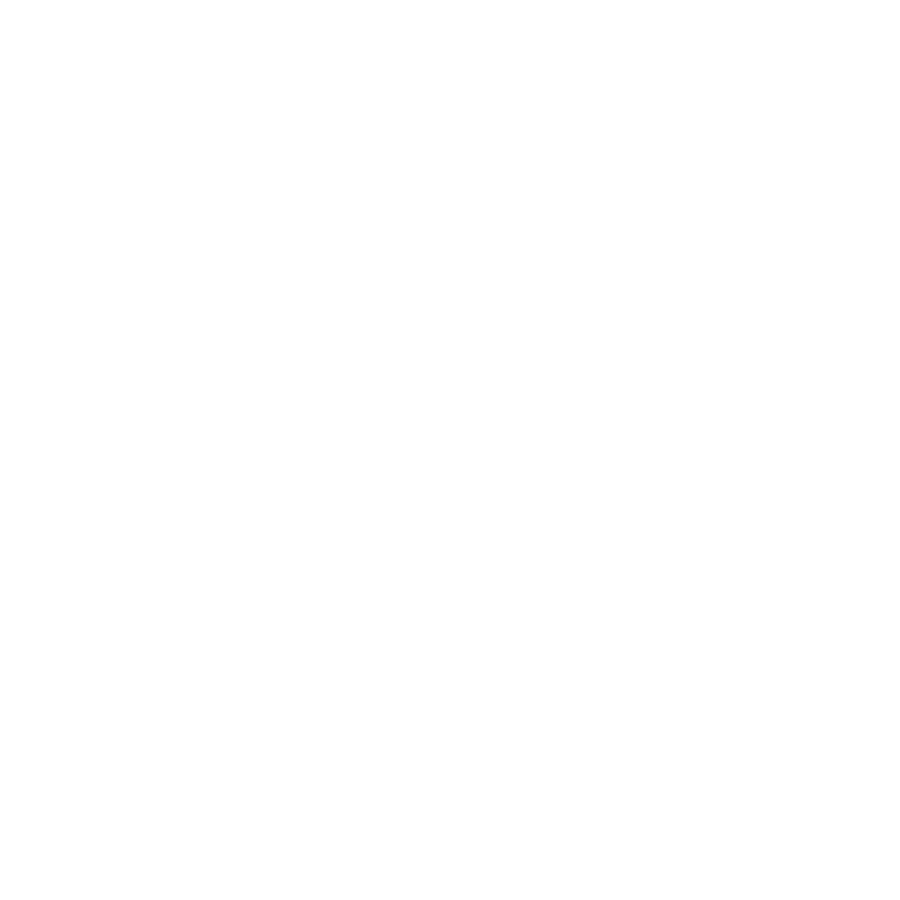

./statistics/DALI-multitask/20220417/config=DALI_multi_1_1_1_onset20_nooffset.yaml/DALI_val_statistics.pkl
./statistics/DALI-mix/20220416/config=DALI_pitch_onset_nooffset.yaml/new_DALI_val_statistics.pkl
./statistics/DALI-mix/20220416/config=DALI_zero_pitch_zero_onset.yaml/new_DALI_val_statistics.pkl


In [4]:
figure, axes = plt.subplot_mosaic([['top', 'top'], ['bottom1', 'BLANK']],
                                  empty_sentinel="BLANK")
figure.set_size_inches(9, 9)
axes['top'].set_xlabel("batch")
axes['top'].set_ylabel("loss")
# axes['top'].set_ylim(0, 8)

axes['bottom1'].set_xlabel("epoch")
axes['bottom1'].set_ylabel("statistics")
# axes['bottom1'].set_xlim(0, 8)
axes['bottom1'].set_ylim(0.6, 0.95)

feature_list=["COn F-value", "COnP F-value"]

# feature_list=["Frame Error",]

# Pithces
# plot_all("DALI-pitch-only", "20220413", "DALI_pitch_1_1_onset20", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=feature_list, color="purple", label="onset 20")
# plot_all("DALI-pitch-only", "20220415", "DALI_pitch_1_1_onset20_nofffset", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=feature_list, color="pink", label="onset 20 no offset")


feature_list.insert(0, "WER")

# Multi
plot_all("DALI-multitask", "20220417", "DALI_multi_1_1_1_onset20_nooffset", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=feature_list, color="r", label="multi 1:1:1, nooffset")

# Pitch + Onset
plot_all("DALI-mix", "20220416", "DALI_pitch_onset_nooffset", ["new_DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="cyan", label="pitch + onset, no offset")
# plot_all("DALI-mix", "20220416", "DALI_pitch_onset_nooffset", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="cyan", label="pitch + onset no offset")


# Zero
plot_all("DALI-mix", "20220416", "DALI_zero_pitch_zero_onset", ["new_DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="black", label="zero pitch + zero onset, new")
# plot_all("DALI-mix", "20220416", "DALI_zero_pitch_zero_onset", ["DALI_val"], axes['top'], axes['bottom1'], feature_list=["WER"], color="black", label="zero pitch + zero onset, new")


# axes['bottom1'].hlines([0.6569,], 0, 50, linestyles='--')

axes['top'].legend()
# axes['bottom1'].legend()
axes['bottom1'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# axes['bottom2'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [5]:
sta_dict = pickle.load(open("./statistics/DALI-mix/20220416/config=DALI_zero_pitch_zero_onset.yaml/DALI_val_statistics.pkl", 'rb'))
errors_zero = np.array([sta['errors'] for sta in sta_dict])
np.argmin(errors_zero, axis=0)

array([42, 49])

In [6]:
sta_dict = pickle.load(open("./statistics/DALI-mix/20220416/config=DALI_pitch_onset_nooffset.yaml/DALI_val_statistics.pkl", 'rb'))
errors_pitch_onset = np.array([sta['errors'] for sta in sta_dict])
np.argmin(errors_pitch_onset, axis=0)

array([51, 59])

In [7]:
sta_dict = pickle.load(open("./statistics/DALI-mix/20220417/config=DALI_onset_only_nooffset.yaml/DALI_val_statistics.pkl", 'rb'))
errors_onset = np.array([sta['errors'] for sta in sta_dict])
np.argmin(errors_onset, axis=0)

array([64, 64])

In [8]:
sta_dict = pickle.load(open("./statistics/DALI-multitask/20220417/config=DALI_multi_1_1_1_onset20_nooffset.yaml/DALI_val_statistics.pkl", 'rb'))
errors_multi = np.array([sta['errors'] for sta in sta_dict])
np.argmin(errors_multi[:,-2:], axis=0)

array([46, 49])

In [9]:
errors_zero[22], errors_onset[22], errors_multi[22]

(array([0.69117473, 0.49288231]),
 array([0.66230764, 0.46302058]),
 array([0.12618428, 0.27478478, 0.46063322, 0.35902475, 0.66774071,
        0.4588688 ]))

In [10]:
print(pickle.load(open("./statistics/DALI-mix/20220410/config=DALI_zero_pitch_tri_onset.yaml/test_statistics.pkl", 'rb'))['DALI_test'])
print(pickle.load(open("./statistics/DALI-mix/20220408/config=DALI_pitch_tri_onset.yaml/test_statistics.pkl", 'rb'))['DALI_test'])
print(pickle.load(open("./statistics/DALI-mix/20220410/config=DALI_zero_pitch_with_tri_onset.yaml/test_statistics.pkl", 'rb'))['DALI_test'])
print(pickle.load(open("./statistics/DALI-mix/20220409/config=DALI_with_pitch_zero_onset.yaml/test_statistics.pkl", 'rb'))['DALI_test'])



{'Dataset': 'DALI_test', 'error names': ['WER', 'CER'], 'errors': array([0.70965143, 0.49037189])}


FileNotFoundError: [Errno 2] No such file or directory: './statistics/DALI-mix/20220408/config=DALI_pitch_tri_onset.yaml/test_statistics.pkl'

In [ ]:
stat_dict_a = pickle.load(open("./statistics/DALI-mix/20220410/config=DALI_zero_pitch_tri_onset.yaml/DALI_val_statistics.pkl", 'rb'))
error_dict_a = extract_stat_list(stat_dict_a)
stat_dict_b = pickle.load(open("./statistics/DALI-mix/20220408/config=DALI_pitch_tri_onset.yaml/DALI_val_statistics.pkl", 'rb'))
error_dict_b = extract_stat_list(stat_dict_b)
stat_dict_c = pickle.load(open("./statistics/DALI-mix/20220410/config=DALI_zero_pitch_with_tri_onset.yaml/DALI_val_statistics.pkl", 'rb'))
error_dict_c = extract_stat_list(stat_dict_c)
stat_dict_d = pickle.load(open("./statistics/DALI-mix/20220409/config=DALI_with_pitch_zero_onset.yaml/DALI_val_statistics.pkl", 'rb'))
error_dict_d = extract_stat_list(stat_dict_d)


|        | train set | val set | test set |
| :---:  | :-------: | :-----: | :------: |
| before | 2390      |  /      | 125      |
| after  | 2263      | 125     | 127      |


| input               |WER on val| WER on test|
| :---                | :---:    | :---:      |
| dummy onset         | 68.10%   | 71.82%     |
| onset               | 65.85%   | 69.64%     |
| dummy onset + pitch | 67.79%   | 71.35%     |
| onset + pitch       | **64.66%**   | **68.80%**     |